# YOLOv3 keras transfer learning

이번 내용은 YOLOv3 모델의 transfer learning에 관한 프로젝트를 다루고자 한다. 혹시라도 해당 글을 통해 transfer learning에 도움을 받고자 하는 마음이 있다면, 시간 절약을 돕기 위해 결론을 먼저 언급하겠다. 이번 글은 '실패'를 다룬다. 의미 있는 결론을 도출한 것이 아니기에 자료로 남길까 고민을 했는데, transfer learning을 처음 시도하며 실패한 과정 속에서 배운 점이 많았기에 그런 점을 바탕으로 글을 남기겠다.

# Introduction

**Project**<br>
먼저 해당 프로젝트에 대하여 간단히 설명하자면, 스터디에서 진행 중인 '마스크 착용 여부 탐지 모델' 프로젝트이다. 코로나 이슈로 인해 마스크 착용이 중요해지면서 해당 주제에 대해 제안하였고, 차후 공장 작업자들의 안전모 착용 여부 탐지 모델을 만들기 위해 구현해보아야 할 퍼포먼스라고 생각을 했다.<br>
<br>
**Model**<br>
Object Detection 모델은 여러 가지가 있는데, 특히 가장 이슈가 된 YOLO 계열의 모델을 사용하고자 한다. 이유를 간단히 언급하자면 다음과 같다. 마스크 착용 여부 탐지는 실시간(Real-time)으로 이루어져야 하는 퍼포먼스이며 따라서 모델의 속도가 중요시된다. Object Detection 모델은 크게 2가지로 나뉘는데(물론 굉장히 많은 모델들이 존재한다), two-stage 방식의 R-CNN 계열 모델과 one-stage 방식의 YOLO 계열 모델이 이에 해당한다. 흔히 정확도는 two-stage 방식이 더 높고(내가 언급한 정확도는 예측값과 실제값의 IoU라고 볼 수 있겠다), 속도는 one-stage 방식이 더 높다. 따라서 Real-time을 좀 더 가능하게 하려면 YOLO 계열의 모델이 적합하다고 생각했고, 여러 버전 중에 최신 버전이며 또한 자료가 많은 v3 버전을 택했다(참고로 최근에 v4 모델을 발표했다).<br>
<br>
**Dataset**<br>
데이터셋은 당연히 마스크 착용자와 미착용자의 annotation이 포함되어있는 데이터셋이 필요하다. 어떤 작업이든 데이터셋을 생성하는 것은 시간과 비용이 많이 필요한 task이다. 먼저 우리가 모델을 잘 사용할 수 있다는 것이 선행되어야 하기 때문에, 바로 데이터셋을 수집하는 방법 대신 Kaggle에서 우연히 Medical Mask Dataset을 확보할 수 있어서 이를 먼저 이용해보기로 했다.<br>
<br>
**Skill**<br>
개인적인 GPU를 가지고 있지 않기 때문에, Google colaboratory pro의 GPU를 사용했다. 딥러닝 프레임워크는 내가 사용한 github repository에서 구현된 Keras를 사용했다.

# Experiment

**Model**<br>
Keras로 구현된 YOLOv3 github repository를 사용했다. 해당 사이트는 다음과 같다.<br>
* https://github.com/experiencor/keras-yolo3

YOLO v3 모델의 개념과 코드 구현은 아래 사이트를 통해 확인할 수 있다.<br>
* https://github.com/YoonSungLee/Detection-Segmentation-Project/blob/master/How_to_Perform_Object_Detection_With_YOLOv3_in_Keras.ipynb<br>
<br>

**Dataset**<br>
Kaggle의 Medical Mask Dataset을 사용했다. 해당 사이트는 다음과 같다.<br>
* https://www.kaggle.com/vtech6/medical-masks-dataset

### Model Download

위의 repository를 clone하여 google drive에 미리 업로드해놓고 작업을 수행했다.

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My Drive/Project/YOLO v3/keras-yolo3

/content/gdrive/My Drive/Project/YOLO v3/keras-yolo3


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 61kB 2.5MB/s 
     |████████████████████████████████| 2.4MB 7.2MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 20.2MB 1.4MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 1.3MB 37.3MB/s 
     |████████████████████████████████| 276kB 40.4MB/s 
     |████████████████████████████████| 3.8MB 43.4MB/s 
     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 512kB 38.1MB/s 
     |████████████████████████████████| 327kB 43.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0f4a494fbd0f7a0f63329da6f2832a0ae6ae188b62169ebcce43259c98e68428
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp36-none-any.whl size=616

흔히 repository에 존재하는 requirements.txt는 해당 모델이 수행하는데에 사용했던 라이브러리와 그 버전이 적혀있다. 라이브러리가 설치가 안되있거나 버전이 다르면 모델을 사용하는데 오류가 날 수 있기 때문에 위와 같은 방법으로 필요한 라이브러리들을 미리 설치한다.

### Kaggle API & Dataset download

Kaggle에서 데이터셋을 미리 다운받아 구글에 업로드 할 수 있다. 하지만 해 본 사람은 알겠지만 구글에 이미지를 업로드하는데 굉장히 시간이 오래 걸린다. 구글 colab상에서 바로 Kaggle의 데이터셋을 받는 방법을 추천한다. 아래 과정을 통해 Kaggle의 데이터셋을 바로 구글드라이브로 업로드 할 수 있다.

In [0]:
!pip install kaggle

In [ ]:
# 다운받은 API Token 업로드 하기
# (개인 key가 보이기 때문에 출력창은 지웠다)
from google.colab import files
files.upload()

In [0]:
# json 파일 제대로 업로드 됐는지 확인
ls -lha kaggle.json

-rw------- 1 root root 67 May 18 05:31 kaggle.json


In [0]:
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
cd medical mask dataset

/content/gdrive/My Drive/Project/YOLO v3/keras-yolo3/medical mask dataset


In [0]:
# 데이터셋 다운로드 받기 - 링크는 그 대회 'Data'에 있음
!kaggle datasets download -d vtech6/medical-masks-dataset

100% 144M/144M [00:01<00:00, 141MB/s]



In [0]:
# 다운로드 된 것들 다 보기 
!ls

medical-masks-dataset.zip


In [ ]:
# 필요하면 압축 풀기
# (출럭창이 너무 길어서 출력창은 지웠다)
!unzip medical-masks-dataset.zip

### Kaggle Reference

구글드라이브에 업로드한 Medical Mask Dataset을 시각화하기 위해 해당 데이터셋 페이지에 올라와있는 Kaggle Notebook을 참고했다. 참고한 사이트는 아래와 같다.
* https://www.kaggle.com/caglaruslu/real-time-medical-mask-detection

In [0]:
!pip install xmltodict

import os
import cv2
import matplotlib.pyplot as plt
import xmltodict
import random
from os import listdir
from os.path import isfile, join
import torchvision
import torch 
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [0]:
def getImageNames():
    image_names = []
    for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Project/YOLO v3/keras-yolo3/medical mask dataset'):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            extension = fullpath[len(fullpath) - 4:]
            if extension != '.xml':
                image_names.append(filename)
    return image_names


def get_path(image_name):
    
    #CREDIT: kaggle.com/dohunkim
    
    home_path = '/content/gdrive/My Drive/Project/YOLO v3/keras-yolo3/medical mask dataset/'
    image_path = home_path + 'images/' + image_name
    
    if image_name[-4:] == 'jpeg':
        label_name = image_name[:-5] + '.xml'
    else:
        label_name = image_name[:-4] + '.xml'
    
    label_path = home_path + 'labels/' + label_name
        
    return  image_path, label_path


def parse_xml(label_path):
    
    #CREDIT: kaggle.com/dohunkim
    
    x = xmltodict.parse(open(label_path , 'rb'))
    item_list = x['annotation']['object']
    
    # when image has only one bounding box
    if not isinstance(item_list, list):
        item_list = [item_list]
        
    result = []
    
    for item in item_list:
        name = item['name']
        bndbox = [(int(item['bndbox']['xmin']), int(item['bndbox']['ymin'])),
                  (int(item['bndbox']['xmax']), int(item['bndbox']['ymax']))]       
        result.append((name, bndbox))
    
    size = [int(x['annotation']['size']['width']), 
            int(x['annotation']['size']['height'])]
    
    return result, size


def visualize_image(image_name, bndbox=True):
    
    #CREDIT: kaggle.com/dohunkim
    
    
    image_path, label_path = get_path(image_name)
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    if bndbox:
        labels, size = parse_xml(label_path)
        thickness = int(sum(size)/400.)
        
        for label in labels:
            name, bndbox = label
            
            if name == 'good':
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 255, 0), thickness)
            elif name == 'bad':
                cv2.rectangle(image, bndbox[0], bndbox[1], (255, 0, 0), thickness)
            else: # name == 'none'
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 0, 255), thickness)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(image_name)
    plt.imshow(image)
    plt.show()

In [0]:
image_names = getImageNames()

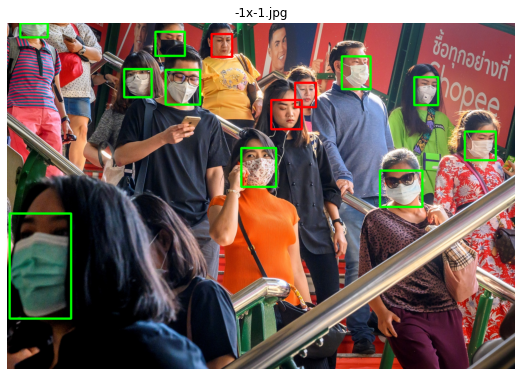

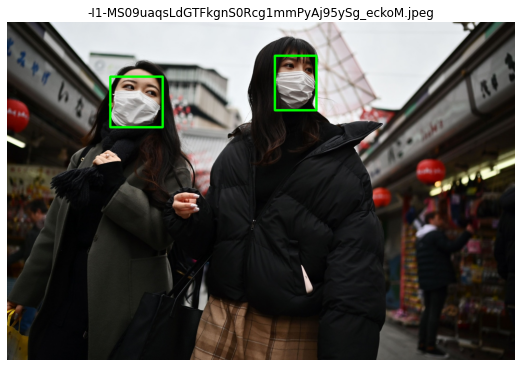

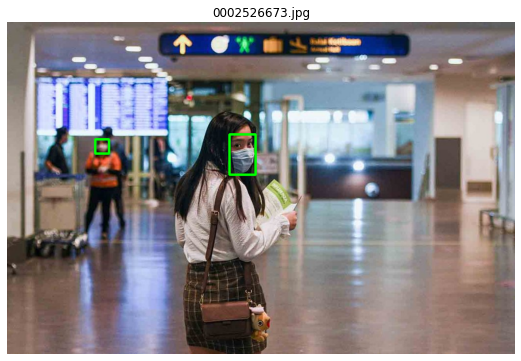

In [0]:
NUM_OF_IMGS_TO_VISUALIZE = 3

for i in range(NUM_OF_IMGS_TO_VISUALIZE):
    visualize_image(image_names[i])

### YOLOv3 Transfer Learning

구현된 모델 및 라이브러리를 올려놓은 github repository는 사용자의 편의를 위해 README.md 파일을 가지고 있다. 해당 repository에 대한 간단한 설명 및 사용 방법 등을 설명해놓은 문서이다. 따라서 transfer learning을 할 때 이를 참고하면 되는데, README.md에 대한 내용은 다음과 같다.

<img src="https://i.imgur.com/ULPlDYr.png" width="100%">

<img src="https://i.imgur.com/WRZVAzq.png" width="100%">

<img src="https://i.imgur.com/XHQTAVg.png" width="100%">

하지만 안타깝게도, 해당 내용을 바탕으로 수많은 에러를 수정하고 주위 사람들에게 자문을 구해서 시도해봤지만 결국 아래 에러를 해결하지 못하고 정체할 수 밖에 없었다. 내가 해결하지 못했던 최종 에러 코드와 함께 수정했던 과정들을 정리하겠다. 왜냐하면 수정했던 과정들 속에서 이러한 repository를 다루는 방법을 어느 정도 배웠기 때문이다.

### The Final Code(having errors)

In [ ]:
!wget http://download1139.mediafire.com/jgnnezpkob5g/l1b96fk7j18yi7v/backend.h5

In [0]:
!python train.py -c config.json

Using TensorFlow backend.
2020-05-21 13:28:37.215909: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-05-21 13:28:37.220435: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-05-21 13:28:37.220717: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x30d8bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-05-21 13:28:37.220754: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-05-21 13:28:37.222755: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-21 13:28:37.384207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05

### Trial and Error

사용하고자 하는 모델을 내가 가지고 있는 데이터셋에 적용하기 위해서는 모델에 기본값으로 설정되어 있는 몇 가지 부분을 수정해주어야 한다. 만약 하나의 모델을 여러 사람이 사용하고자 하는 경우, 매번 사용할때마다 코드를 완전히 이해하여 수정하기는 어려우며 설계자도 이를 원하지 않을 것이다. 따라서 custom dataset에 따라 바꿔주어야 할 부분을 마치 변수처럼 남겨두고, 그 부분을 쉽게 제어할 수 있는 파일이 config 파일이다. 참고로 이 정의는 확실한 정의는 아니다. 단지 내가 겪으면서 이런 기능이 있다는 것을 시행착오를 거치면서 알아냈을 뿐이다. 따라서 config 파일의 더 중요한 용도가 있을 가능성도 존재한다. 어쨌든 모델을 custom data로 transfer learning을 하기 위해서는 config 파일을 고쳐야하는데, 원본 파일과 내가 수정한 파일을 동시에 보여주겠다.

<img src="https://i.imgur.com/cWkrCEg.png" width="100%">

위의 이미지가 github repository에 있는 config 파일이다.

<img src="https://i.imgur.com/UbgXCLW.png" width="100%">

그리고 위의 이미지는 custom dataset에 맞게 수정한 config 파일이다.

config 파일의 수정내용은 다음과 같다.<br>
<br><br>
**labels**<br>
먼저 labels를 자신의 custom dataset의 label에 맞게 수정해주어야 한다. 이 때 label의 이름은 동일하게 바꿔준다. Medical Mask Dataset은 good, bad, none 이렇게 3가지 클래스를 가지고 있기에 위와 같이 수정하였다.<br>
<br>
**train_image_folder & train_annot_folder**<br>
image가 들어있는 폴더와 annotation이 들어있는 폴더의 경로를 재설정해준다. 해당 repository는 annotation file을 xml로 사용했지만, 다른 respository는 txt 파일을 요구하는 경우도 있다. 이를 염두해두도록 한다.<br>
<br>
**cache_name**<br>
cache_name은 pycache 라이브러리의 이용을 통해 만들어지는 파일로써, 프로그램 실행 시 모듈 로딩을 빠르게 하기 위해 인터프리터가 먼저 바이트코드를 컴파일하여 \_\_pycache\_\_ 폴더에 저장한다고 한다. 아직 확실한 개념과 그 효과를 인지하지 못했기 때문에 임의의 파일명을 입력하고 처리했다.<br>
**추가적으로 알게 된 사실은, 실행할때마다 cache_name으로 선언한 pkl파일에 기록이 저장되어 다시 코드를 실행하면 오류가 뜬다. 따라서 실행할때마다 파일을 지우거나, 이름을 바꿔주어야 한다.**<br>
<br>
**gpus**<br>
처음 설정된 gpus를 살펴보면 '0,1'로써 2개의 GPU를 사용한다는 의미라고 한다. 하지만 google colab은 한 번에 하나의 GPU를 제공하기 때문에 이를 '0'으로 바꿔준다.<br>
<br>
**saved_weights_name**<br>
내가 사용하고자 하는 모델은 COCO dataset으로 pretrained된 모델을 사용해야 좀 더 general한 출발을 할 수 있기 때문에 사용하고자 하는 h5파일을 바꿔주었다.<br>
**추가적으로 알게 된 사실은, README.md의 Detection 파트에서 소개되어있는 h5 파일을 실행시키면 오류가 뜬다. 따라서 backend.h5를 다운받아야 한다. 이는 해당 github의 Pull request를 통해 확인할 수 있었다. h5를 다운 받는 방법은 위의 The Final Code에 소개되어있고, 도움받았던 Pull request 주소는 다음과 같다.**<br>
* https://github.com/experiencor/keras-yolo3/pull/180

# Failed and To Think

### Failed

지속적인 에러의 발생과 이를 해결하기 위한 탐색 및 시도를 반복적으로 하다 보니 며칠이 금방 지나가버렸고, 이런 식으로 진행하면 성과도 낼 수 없을 뿐더러 스터디 프로젝트에 차질이 생길 것이라고 생각했다. 특히 Keras API가 high level deeplearning framework이기 때문에 어떤 부분을 더 손대야할지 더이상 감이 오지 않았다. 따라서 해당 github repository를 포기하고 현재는 pytorch 공부와 함께 pytorch로 구현된 repository, 그리고 다른 transfer learning tutorial을 통해 프로젝트를 진행하는 것을 계획하고 있다. 이를 해결하기 위해 수많은 사람들에게 도움을 요청하고 끝까지 매달려봤지만 끝내 에러를 해결하지 못한 것이 아쉬운 마음이 있다. 해결하지 못한 에러 내용과 함께 추가적으로 수행하면서 좀 더 생각해봐야 할 점을 언급하고 마무리하도록 하겠다.

<img src="https://i.imgur.com/HhQunmZ.png" width="100%">

### To Think

**About Error**<br>
<br>
마지막 에러를 찾는 과정에서 많은 페이지를 살펴봤는데, 그 중 나의 오류와 가장 밀접한 내용은 해당 github repository의 Issues에 있었다. 이번 시행착오를 통해 github의 Issues와 Pull requests를 보는 습관을 어느 정도 기를 수 있었다. 또한 문제를 해결한 분에게 Quote reply를 남김으로써 몇 가지의 과정을 해결할 수 있었다. 도움을 받을 수 있었던 Issue 페이지는 다음과 같다.
* https://github.com/experiencor/keras-yolo3/issues/248

**About anchors in config.json**<br>
<br>
사실 YOLOv3는 anchor box를 모든 데이터셋에 공용으로 사용할 수 있도록 미리 설정해놓는 방법으로 수행하지 않는다. 대신 데이터셋을 k-means clustering 과정을 통해 anchor box를 추출한다. 이해하기 쉽게 예로 들어서 설명하겠다. 만약 보행자를 탐지하기 위해 모델을 transfer learning해본다고 가정해보자. 데이터 또한 마찬가지로 보행자들을 대상으로 annotation이 되어있을것이고, 그 형태는 길쭉한 직사각형이 많을 것이다. 그렇다면 우리는 보행자를 예측하기 위해 널찍한 사각형이 많이 필요할까? 보행자의 형태는 길쭉한 형태이기 때문에, 널찍한 직사각형보다는 길쭉한 직사각형이 학습이나 성능 면에 있어서 유리한 것은 조금만 생각해봐도 알 수 있다. 따라서 데이터셋을 k-means clustering하여 길쭉한 직사각형 위주로 anchor의 크기를 초기화한다.<br>
하고 싶은 말은, YOLOv3를 제대로 transfer learning 하고싶다면 이 과정도 포함되어야 한다는 것이다. README.md에서도 'Generate anchors for your dataset' 이라는 파트가 따로 명시되어있다. 나는 config.json 파일에 그 과정을 생략했는데, 원칙대로 하자면 이 과정을 포함시켜야 할 것이다.

만약 추가적인 시도 끝에 문제를 해결하거나 해결 과정 중에 얻은 인사이트가 생기면 update하도록 하겠다.